# Задание по программированию: Бэггинг и случайный лес

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

In [1]:
# Suppress Deprication Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
from sklearn import model_selection, datasets, grid_search, linear_model, metrics, tree, ensemble
import numpy as np
import pandas as pd
%pylab inline

D:\Shef\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Shef\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [3]:
# load data
digits = datasets.load_digits()
digits_target = digits.target
digits_data = digits.data

In [4]:
print digits_data.shape
print digits_target.shape

(1797L, 64L)
(1797L,)


## 1. DecisionTreeClassifier
Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [5]:
DCT_classifier = tree.DecisionTreeClassifier(random_state = 3634)
DCT_scoring = model_selection.cross_val_score(DCT_classifier, digits_data, digits_target, cv = 10)
print DCT_scoring
print DCT_scoring.mean()

[0.81621622 0.85245902 0.82320442 0.80555556 0.76536313 0.88826816
 0.86592179 0.8258427  0.83050847 0.81818182]
0.8291521270067719


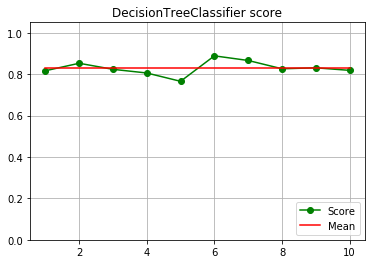

In [6]:
pylab.grid(True)
pylab.plot(range(1, 11), DCT_scoring, 'g-', marker='o', label='Score')
pylab.plot([1,10], [DCT_scoring.mean(), DCT_scoring.mean()], 'r-', label='Mean')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')
pylab.title('DecisionTreeClassifier score')
pylab.show()

In [7]:
type(DCT_scoring)

numpy.ndarray

# 2. BaggingClassifier
Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [8]:
%%time
Bag_classifier = ensemble.BaggingClassifier(n_estimators=100, random_state=3634)
Bag_scoring = model_selection.cross_val_score(Bag_classifier, digits_data, digits_target, cv = 10)
print Bag_scoring
print Bag_scoring.mean()

[0.87027027 0.96721311 0.90607735 0.94444444 0.92178771 0.98324022
 0.96089385 0.92134831 0.87570621 0.93181818]
0.9282799676358797
Wall time: 14.5 s


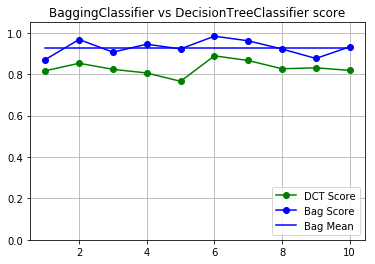

In [9]:
pylab.grid(True)
pylab.plot(range(1, 11), DCT_scoring, 'g-', marker='o', label='DCT Score')
pylab.plot(range(1, 11), Bag_scoring, 'b-', marker='o', label='Bag Score')
pylab.plot([1,10], [Bag_scoring.mean(), Bag_scoring.mean()], 'b-', label='Bag Mean')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')
pylab.title('BaggingClassifier vs DecisionTreeClassifier score')
pylab.show()

# 3. BaggingClassifier, ограничение признаков $\sqrt(d)$

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [10]:
%%time
d_limit = int(np.sqrt(digits_data.shape[1]))
Bag_classifier_d = ensemble.BaggingClassifier(n_estimators=100, max_features=d_limit, random_state=3634)
Bag_scoring_d = model_selection.cross_val_score(Bag_classifier_d, digits_data, digits_target, cv = 10)
print Bag_scoring_d
print Bag_scoring_d.mean()

[0.91891892 0.9726776  0.93370166 0.91666667 0.9273743  0.95530726
 0.96648045 0.95505618 0.90960452 0.90909091]
0.9364878458485949
Wall time: 4.81 s


# 4. 
Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 

In [11]:
DCT_classifier_2 = tree.DecisionTreeClassifier(max_features = 'sqrt', random_state = 3634)
DCT_scoring_2 = model_selection.cross_val_score(DCT_classifier_2, digits_data, digits_target, cv = 10)
print DCT_scoring_2
print DCT_scoring_2.mean()

[0.71891892 0.85245902 0.74585635 0.73888889 0.76536313 0.76536313
 0.83798883 0.80898876 0.76271186 0.77840909]
0.7774947980952107


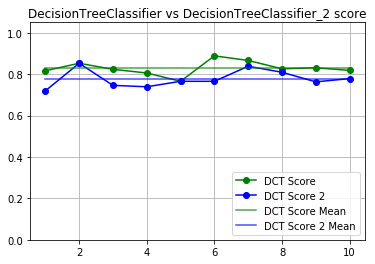

In [12]:
pylab.grid(True)
pylab.plot(range(1, 11), DCT_scoring, 'g-', marker='o', label='DCT Score')
pylab.plot(range(1, 11), DCT_scoring_2, 'b-', marker='o', label='DCT Score 2')
pylab.plot([1,10], [DCT_scoring.mean(), DCT_scoring.mean()], 'g-', label='DCT Score Mean', alpha = 0.7)
pylab.plot([1,10], [DCT_scoring_2.mean(), DCT_scoring_2.mean()], 'b-', label='DCT Score 2 Mean', alpha = 0.7)
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')
pylab.title('DecisionTreeClassifier vs DecisionTreeClassifier_2 score')
pylab.show()

# 4. BaggingClassifier, выбор случайных признаков при построении каждой вершины дерева
Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 

In [13]:
%%time
DCT_classifier_2 = tree.DecisionTreeClassifier(max_features = 'sqrt', random_state = 3634)
Bag_classifier_2 = ensemble.BaggingClassifier(base_estimator = DCT_classifier_2, n_estimators=100, random_state=3634)
Bag_scoring_2 = model_selection.cross_val_score(Bag_classifier_2, digits_data, digits_target, cv = 10)
print Bag_scoring_2
print Bag_scoring_2.mean()

[0.9027027  0.96721311 0.93922652 0.95       0.96648045 0.97206704
 0.97206704 0.97191011 0.93220339 0.92613636]
0.9500006727759904
Wall time: 4.89 s


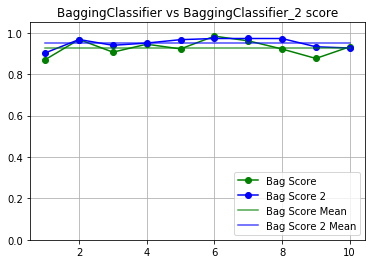

In [14]:
pylab.grid(True)
pylab.plot(range(1, 11), Bag_scoring, 'g-', marker='o', label='Bag Score')
pylab.plot(range(1, 11), Bag_scoring_2, 'b-', marker='o', label='Bag Score 2')
pylab.plot([1,10], [Bag_scoring.mean(), Bag_scoring.mean()], 'g-', label='Bag Score Mean', alpha = 0.7)
pylab.plot([1,10], [Bag_scoring_2.mean(), Bag_scoring_2.mean()], 'b-', label='Bag Score 2 Mean', alpha = 0.7)
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')
pylab.title('BaggingClassifier vs BaggingClassifier_2 score')
pylab.show()

# 5. Random Forest
Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

## 5.1 Оценка качества Random Forest

In [15]:
%%time
RF_classifier = ensemble.RandomForestClassifier(n_estimators=100, random_state=3634)
RF_scoring = model_selection.cross_val_score(RF_classifier, digits_data, digits_target, cv = 10)
print RF_scoring
print RF_scoring.mean()

[0.91351351 0.9726776  0.95027624 0.95555556 0.94972067 0.97765363
 0.96648045 0.95505618 0.92090395 0.94318182]
0.9505019609154118
Wall time: 4.74 s


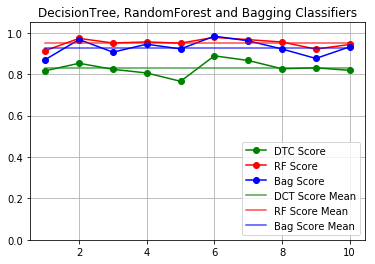

In [16]:
pylab.grid(True)
pylab.plot(range(1, 11), DCT_scoring, 'g-', marker='o', label='DTC Score')
pylab.plot(range(1, 11), RF_scoring, 'r-', marker='o', label='RF Score')
pylab.plot(range(1, 11), Bag_scoring, 'b-', marker='o', label='Bag Score')
pylab.plot([1,10], [DCT_scoring.mean(), DCT_scoring.mean()], 'g-', label='DCT Score Mean', alpha = 0.7)
pylab.plot([1,10], [RF_scoring.mean(), RF_scoring.mean()], 'r-', label='RF Score Mean', alpha = 0.7)
pylab.plot([1,10], [Bag_scoring.mean(), Bag_scoring.mean()], 'b-', label='Bag Score Mean', alpha = 0.7)
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')
pylab.title('DecisionTree, RandomForest and Bagging Classifiers')
pylab.show()

## 5.2 Random Forest. Зависимость качества от количества деревьев

In [17]:
%%time
estimators = [5, 10, 20, 50, 75, 100, 200, 300, 400, 500]
est_scores =[]
for est in estimators:
    RF_classifier = ensemble.RandomForestClassifier(n_estimators=est, random_state=36, n_jobs = 4)
    est_scores.append(model_selection.cross_val_score(RF_classifier, digits_data, digits_target, cv = 10, n_jobs = 4).mean())
print np.round(est_scores, 5)

[0.88261 0.90873 0.93608 0.9472  0.94994 0.95328 0.95165 0.95165 0.95331
 0.95278]
Wall time: 46.8 s


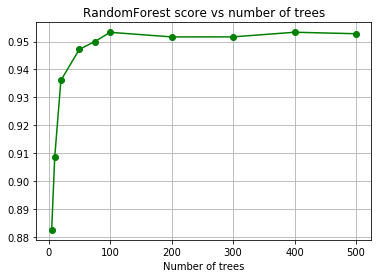

In [18]:
pylab.grid(True)
pylab.plot(estimators, est_scores, 'g-', marker='o')
pylab.title('RandomForest score vs number of trees')
pylab.xlabel('Number of trees')
pylab.show()

## 5.3 Random Forest. Зависимость качества от количества признаков, выбираемых при построении каждой вершины дерева

In [19]:
%%time
features = np.linspace(1, digits_data.shape[1], 9, dtype = 'int')
feat_scores =[]
for feat in features:
    RF_classifier = ensemble.RandomForestClassifier(n_estimators=100, max_features= feat, random_state=36, n_jobs = 4)
    feat_scores.append(model_selection.cross_val_score(RF_classifier, digits_data, digits_target, cv = 10, n_jobs = 4).mean())
print np.round(feat_scores, 5)

[0.94708 0.95328 0.94609 0.94333 0.94435 0.93827 0.93609 0.93273 0.93052]
Wall time: 36.9 s


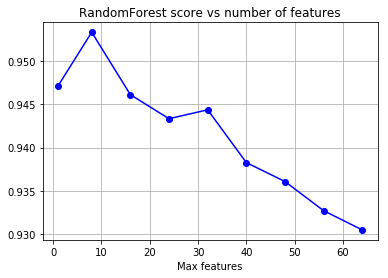

In [20]:
pylab.grid(True)
pylab.plot(features, feat_scores, 'b-', marker='o')
pylab.title('RandomForest score vs number of features')
pylab.xlabel('Max features')
pylab.show()

## 5.4 Random Forest. Зависимость качества от ограничения на глубину дерева

In [21]:
%%time
depths = [2, 4, 6, 8, 10, 15, 20, 25, 50]
depth_scores =[]
for d in depths:
    RF_classifier = ensemble.RandomForestClassifier(n_estimators=100, max_depth = d, random_state=36, n_jobs = 4)
    depth_scores.append(model_selection.cross_val_score(RF_classifier, digits_data, digits_target, cv = 10, n_jobs = 4).mean())
print np.round(depth_scores, 5)

[0.79738 0.89526 0.92546 0.94544 0.94949 0.95218 0.95328 0.95328 0.95328]
Wall time: 30.4 s


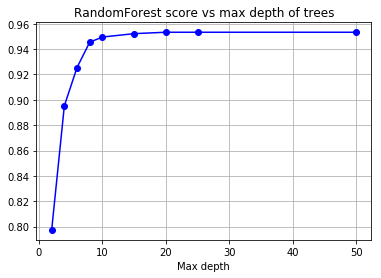

In [22]:
pylab.grid(True)
pylab.plot(depths, depth_scores, 'b-', marker='o')
pylab.title('RandomForest score vs max depth of trees')
pylab.xlabel('Max depth')
pylab.show()

# 5.5 Ответы
На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

Правильные утверждения: 2 3 4 7

# 6. Сравнение результатов

In [23]:
print 'Средняя точность классификатора {} = {:.5f}'.format('DecisionTree', DCT_scoring.mean())
print 'Средняя точность классификатора {} = {:.5f}'.format('Bagging', Bag_scoring.mean())
print 'Средняя точность классификатора {} = {:.5f}'.format('Bagging при ограничении числа признаков', Bag_scoring_d.mean())
print 'Средняя точность классификатора {} = {:.5f}'.format('Bagging при случайном выборе признаков', Bag_scoring_2.mean())
print 'Средняя точность классификатора {} = {:.5f}'.format('RandomForest', RF_scoring.mean())

Средняя точность классификатора DecisionTree = 0.82915
Средняя точность классификатора Bagging = 0.92828
Средняя точность классификатора Bagging при ограничении числа признаков = 0.93649
Средняя точность классификатора Bagging при случайном выборе признаков = 0.95000
Средняя точность классификатора RandomForest = 0.95050
